
Original Image Info:
Data type: uint8
Bits per value: 8
Floating point: False
Integer: True
Value range: [0, 255]

Quantizing to: <class 'numpy.int16'>

Quantized Image Info:
Data type: int16
Bits per value: 16
Floating point: False
Integer: True
Value range: [-32768, 32767]


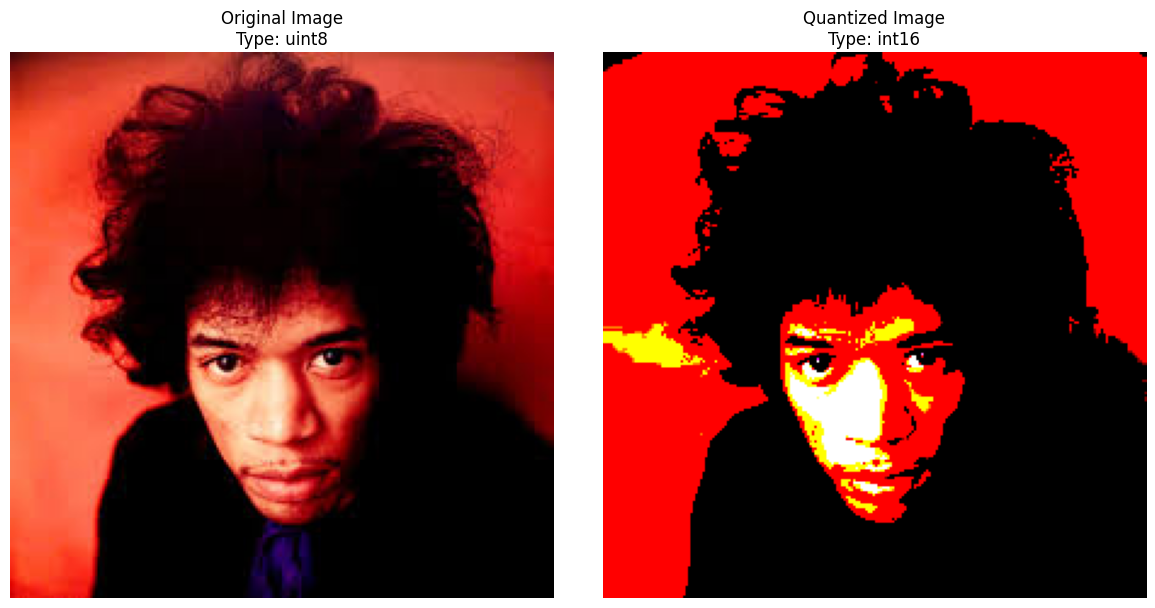

TypeError: Cannot handle this data type: (1, 1, 3), <i2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

def get_image_dtype_info(img_array):
    """Определяет и возвращает информацию о типе данных изображения"""
    dtype = img_array.dtype
    dtype_info = {
        'dtype': dtype,
        'bits': dtype.itemsize * 8,
        'is_float': np.issubdtype(dtype, np.floating),
        'is_int': np.issubdtype(dtype, np.integer),
        'min_val': np.iinfo(dtype).min if np.issubdtype(dtype, np.integer) else np.finfo(dtype).min,
        'max_val': np.iinfo(dtype).max if np.issubdtype(dtype, np.integer) else np.finfo(dtype).max,
    }
    return dtype_info

def quantize_image(img_array, target_dtype):
    """Квантует изображение до указанного типа данных"""
    if np.issubdtype(target_dtype, np.floating):
        # Для плавающей точки просто приводим тип
        return img_array.astype(target_dtype)
    else:
        # Для целых чисел масштабируем значения
        img_min = img_array.min()
        img_max = img_array.max()
        target_min = np.iinfo(target_dtype).min
        target_max = np.iinfo(target_dtype).max

        if img_min == img_max:
            return np.zeros_like(img_array, dtype=target_dtype)

        scaled = (img_array - img_min) / (img_max - img_min) * (target_max - target_min) + target_min
        return scaled.astype(target_dtype)

def visualize_images(original_img, quantized_img, original_dtype, quantized_dtype):
    """Визуализирует оригинальное и квантованное изображения"""
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray' if len(original_img.shape) == 2 else None)
    plt.title(f'Original Image\nType: {original_dtype}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(quantized_img, cmap='gray' if len(quantized_img.shape) == 2 else None)
    plt.title(f'Quantized Image\nType: {quantized_dtype}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def print_dtype_info(info, title):
    """Выводит информацию о типе данных"""
    print(f"\n{title}:")
    print(f"Data type: {info['dtype']}")
    print(f"Bits per value: {info['bits']}")
    print(f"Floating point: {info['is_float']}")
    print(f"Integer: {info['is_int']}")
    print(f"Value range: [{info['min_val']}, {info['max_val']}]")

# Пример использования
if __name__ == "__main__":
    # Загрузка тестового изображения (можно заменить на свое)
    image_path = '/content/jimi_hen1.jpg'  # Замените на путь к вашему изображению
    try:
        original_img = np.array(Image.open(image_path))
    except FileNotFoundError:
        # Создаем синтетическое изображение, если файл не найден
        print("Файл изображения не найден, создаем синтетическое изображение...")
        original_img = np.random.rand(256, 256, 3) * 1000
        original_img = original_img.astype(np.float32)

    # Получаем информацию о типе данных оригинального изображения
    original_info = get_image_dtype_info(original_img)
    print_dtype_info(original_info, "Original Image Info")

    # Выбираем целевой тип данных для квантования
    if original_info['is_float']:
        # Если оригинальное изображение в формате с плавающей точкой
        target_dtype = np.float16 if original_info['bits'] > 16 else np.float32
    else:
        # Если оригинальное изображение целочисленное
        target_dtype = np.int8 if original_info['bits'] > 8 else np.int16

    print(f"\nQuantizing to: {target_dtype}")

    # Квантуем изображение
    quantized_img = quantize_image(original_img, target_dtype)
    quantized_info = get_image_dtype_info(quantized_img)
    print_dtype_info(quantized_info, "Quantized Image Info")

    # Визуализируем результаты
    visualize_images(original_img, quantized_img, original_info['dtype'], quantized_info['dtype'])

    # Дополнительно: сохраняем квантованное изображение
    output_path = 'quantized_image.png'
    Image.fromarray(quantized_img).save(output_path)
    print(f"\nQuantized image saved to: {output_path}")